##Situational Overview (Business Need) You are working for a wealthy investor that specialises in purchasing assets that are undervalued. This investor’s due diligence on all purchases includes a detailed analysis of the data that underlies the business, to try to understand the fundamentals of the business and especially to identify opportunities to drive profitability by changing the focus of which products or services are being offered.

The investor is interested in purchasing TellCo, an existing mobile service provider in the Republic of Pefkakia. TellCo’s current owners have been willing to share their financial information but have never employed anyone to look at their data that is generated automatically by their systems.

Your employer wants you to provide a report to analyse opportunities for growth and make a recommendation on whether TellCo is worth buying or selling. You will do this by analysing a telecommunication dataset that contains useful information about the customers & their activities on the network. You will deliver insights you managed to extract to your employer through an easy to use web based dashboard and a written report.

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.1f' % x)
pd.set_option('display.max_columns', None)

In [4]:
df=pd.read_csv('../data/clean_data.csv')

In [5]:
df.head()

,Unnamed: 0,index,Bearer_Id,Dur. (ms),IMSI,MSISDN,IMEI,last_location,avg_rtt_dl,avg_rtt_ul,throughput_avg_dl_kpbs,throughput_avg_ul_kpbs,retrans_packets_dl_b,retrans_packets_ul_b,tp_dl_below_50kbps_pc,tp_dl_50_250kbps_pc,tp_dl_250kbps_1mbps_pc,tp_dl_above_1mbps_pc,tp_ul_below_10kpbs_pc,tp_ul_10_50_kbps_pc,tp_ul_50_300_kbps_pc,tp_ul_above_300_kpbs_pc,activity_duration_dl,activity_duration_ul,Dur. (ms).1,phone_company,phone_name,t_vol_dl_above_6250B,t_vol_ul_above_1250B,socials_dl_b,socials_ul_b,google_dl_b,google_ul_b,email_dl_b,email_ul_b,youtube_dl_b,youtube_ul_b,netflix_dl_b,netflix_ul_b,gaming_dl_b,gaming_ul_b,other_dl_b,other_ul_b,Total_ul_b,Total_dl_b
0,0,0,13114483460844900352.0,1823652.0,208201448079117.0,33664962239.0,35521209507511.0,9.16456699548519E+015,42.0,5.0,23.0,44.0,20884183.3,766247.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1823652892.0,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1,1,13114483482878900224.0,1365104.0,208201909211140.0,33681854413.0,35794009006359.0,L77566A,65.0,5.0,16.0,26.0,20884183.3,766247.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1365104371.0,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2,2,13114483484080500736.0,1361762.0,208200314458056.0,33760627129.0,35281510359387.0,D42335A,108.2,17.6,6.0,9.0,20884183.3,766247.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1361762651.0,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,3,3,13114483485442799616.0,1321509.0,208201402342131.0,33750343200.0,35356610164913.0,T21824A,108.2,17.6,44.0,44.0,20884183.3,766247.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1321509685.0,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4,4,13114483499480700928.0,1089009.0,208201401415120.0,33699795932.0,35407009745539.0,D88865A,108.2,17.6,6.0,9.0,20884183.3,766247.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1089009389.0,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
df=df.drop(columns=['index','Unnamed: 0'])

In [7]:
rows = df.shape[0]
cols = df.shape[1]
print('There are {} rows and {} columns in the data.'.format(rows, cols))

There are 148506 rows and 43 columns in the data.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 43 columns):
Bearer_Id                    148506 non-null float64
Dur. (ms)                    148506 non-null float64
IMSI                         148506 non-null float64
MSISDN                       148506 non-null float64
IMEI                         148506 non-null float64
last_location                148506 non-null object
avg_rtt_dl                   148506 non-null float64
avg_rtt_ul                   148506 non-null float64
throughput_avg_dl_kpbs       148506 non-null float64
throughput_avg_ul_kpbs       148506 non-null float64
retrans_packets_dl_b         148506 non-null float64
retrans_packets_ul_b         148506 non-null float64
tp_dl_below_50kbps_pc        148506 non-null float64
tp_dl_50_250kbps_pc          148506 non-null float64
tp_dl_250kbps_1mbps_pc       148506 non-null float64
 tp_dl_above_1mbps_pc        148506 non-null float64
tp_ul_below_10kpbs_pc        148506 non-nu

In [9]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Bearer_Id,148506.0,10146757650164756480.0,2893261633271228928.0,6917537518543529984.0,7349883247462785024.0,7349883264172940288.0,13042425978973900800.0,13186541167134199808.0
Dur. (ms),148506.0,105084.1,81072.7,7142.0,58248.8,86399.0,132932.8,1859336.0
IMSI,148506.0,208201599922260.4,15243472825.7,204047108489451.0,208201401264008.0,208201546332650.5,208201771619073.2,208252167239575.0
MSISDN,148506.0,41906541782.2,2450975846357.3,33601001722.0,33651311444.2,33663708556.0,33683515176.8,882397108489451.0
IMEI,148506.0,48500684616792.0,22432166298203.5,440015202000.0,35460708962514.0,35722309017450.0,86119704824101.0,99001201327774.0
avg_rtt_dl,148506.0,106.6,529.6,0.0,35.0,54.0,108.2,96923.0
avg_rtt_ul,148506.0,17.6,76.5,0.0,3.0,7.0,17.6,7120.0
throughput_avg_dl_kpbs,148506.0,13287.5,23993.5,0.0,43.0,63.0,19699.5,378160.0
throughput_avg_ul_kpbs,148506.0,1770.6,4630.3,0.0,47.0,62.0,1116.0,58613.0
retrans_packets_dl_b,148506.0,20934339.6,117153505.2,2.0,1410988.2,20884183.3,20884183.3,4294425570.0


In [10]:
df.describe(include=[np.object]).T

,count,unique,top,freq
last_location,148506,45379,D41377B,80
phone_company,148506,170,Apple,59339
phone_name,148506,1391,Huawei B528S-23A,19727


# task one

## 1.Start by identifying the top 10 handsets used by the customers.

In [11]:
top_10_phones=df['phone_name'].value_counts().head(10)#look at the undefined fiels again

In [12]:
top_10_phones

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
undefined                        8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: phone_name, dtype: int64

## 2.Start by identifying the top 3 handset manufacturers

In [13]:
top_3_companies=df['phone_company'].value_counts().head(3)#look at the undefined fiels again

In [14]:
top_3_companies

Apple      59339
Samsung    40429
Huawei     34296
Name: phone_company, dtype: int64

## 3.Identify the top 5 handsets per top 3 handset manufacturer

# Apple

In [23]:
phones=df.groupby(['phone_company'])
phones.get_group('Apple')['phone_name'].value_counts()[:5]

Apple iPhone 6S (A1688)    9395
Apple iPhone 6 (A1586)     8993
Apple iPhone 7 (A1778)     6279
Apple iPhone Se (A1723)    5165
Apple iPhone 8 (A1905)     4977
Name: phone_name, dtype: int64

# Samsung

In [25]:
phones=df.groupby(['phone_company'])
phones.get_group('Samsung')['phone_name'].value_counts()[:5]

Samsung Galaxy S8 (Sm-G950F)    4464
Samsung Galaxy A5 Sm-A520F      3700
Samsung Galaxy J5 (Sm-J530)     3675
Samsung Galaxy J3 (Sm-J330)     3456
Samsung Galaxy S7 (Sm-G930X)    3171
Name: phone_name, dtype: int64

# Huawei

In [22]:
phones=df.groupby(['phone_company'])
phones.get_group('Huawei')['phone_name'].value_counts()[:5]

Huawei B528S-23A                  19727
Huawei E5180                       2074
Huawei P20 Lite Huawei Nova 3E     2012
Huawei P20                         1475
Huawei Y6 2018                      996
Name: phone_name, dtype: int64

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Function to calculate missing values by column





###################################PLOTTING FUNCTIONS###################################
def format_float(value):
    return f'{value:,.2f}'


def plot_count(df:pd.DataFrame, column:str) -> None:
    df_top10 = df[column].value_counts()[:10]
    x = df_top10.index.values.tolist()
    y = df_top10.values.tolist()
    
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    

pd.options.display.float_format = format_float

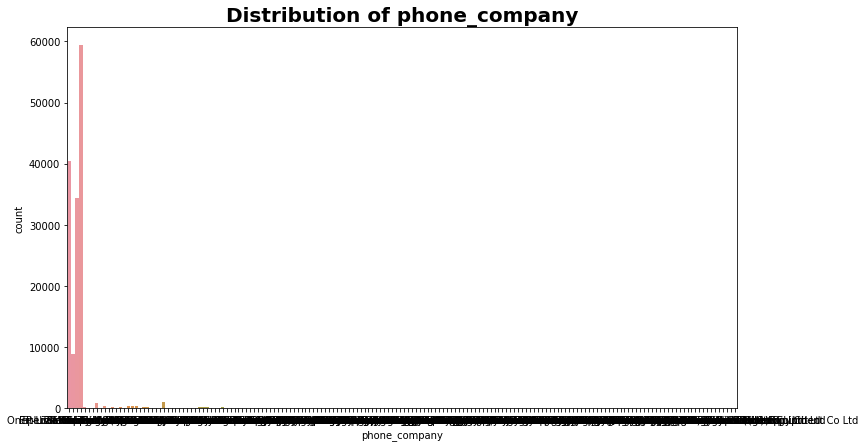

In [17]:
plot_count(df, "phone_company")

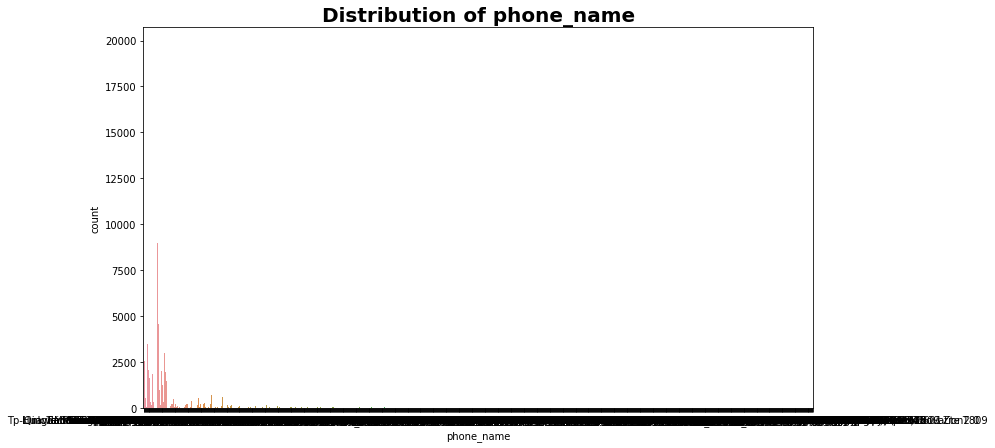

In [18]:
plot_count(df, "phone_name")

# Make a short interpretation and recommendation to marketing teams

-Apple,Samsung and Huawei are the leading phone manufacturers
-It is important for apple to target the following iphone users:

Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Apple iPhone X 
Apple iPhone 8 Plus (A1897)           3014
Apple iPhone 6S Plus (A1687)          2177
-Most of our users use Iphones.It is important to find strategie sto retain the customer.Find activations to get more users on the newer brands since iphones 6,7 are perfoming better.

-Huawei should target the following more:
Huawei B528S-23A                    19727
Huawei E5180                          2074
Huawei P20 Lite Huawei Nova 3E        2018
-Their best seller is huawei B528S-23A
-Samsung should target the folowing more:
Samsung Galaxy S8 (Sm-G950F)     4480
Samsung Galaxy A5 Sm-A520F            3707
Samsung Galaxy J5 (Sm-J530)           3681
Samsung Galaxy J3 (Sm-J330)           3464
Samsung Galaxy S7 (Sm-G930X)          3176
Samsung Galaxy A8 (2018)              2575
Samsung Galaxy S7 Edge (Sm-G935X)     194
Their best seller is a samsung galaxy S8

In telecommunication, CDR or Call Detail Record is the voice channel and XDR is the data channel equivalent. So here, consider xDR as data sessions Detail Record. In xDR, user behavior can be tracked through the following applications:  Social Media, Google, Email, Youtube, Netflix, Gaming, Other . 



# Task 1.1

- Your employer wants to have an overview of the users’ behavior on those applications.   
Aggregate per user the following information in the column  
number of xDR sessions
Session duration
the total download (DL) and upload (UL) data
the total data volume (in Bytes) during this session for each application


In [19]:
df.columns

Index(['Bearer_Id', 'Dur. (ms)', 'IMSI', 'MSISDN', 'IMEI', 'last_location',
       'avg_rtt_dl', 'avg_rtt_ul', 'throughput_avg_dl_kpbs',
       'throughput_avg_ul_kpbs', 'retrans_packets_dl_b',
       'retrans_packets_ul_b', 'tp_dl_below_50kbps_pc', 'tp_dl_50_250kbps_pc',
       'tp_dl_250kbps_1mbps_pc ', ' tp_dl_above_1mbps_pc',
       'tp_ul_below_10kpbs_pc', 'tp_ul_10_50_kbps_pc ',
       'tp_ul_50_300_kbps_pc  ', '  tp_ul_above_300_kpbs_pc',
       'activity_duration_dl', 'activity_duration_ul', 'Dur. (ms).1',
       'phone_company', 'phone_name', 't_vol_dl_above_6250B ',
       't_vol_ul_above_1250B', 'socials_dl_b', 'socials_ul_b', 'google_dl_b',
       'google_ul_b', 'email_dl_b', 'email_ul_b', 'youtube_dl_b',
       'youtube_ul_b', 'netflix_dl_b', 'netflix_ul_b', 'gaming_dl_b',
       'gaming_ul_b', 'other_dl_b', 'other_ul_b', 'Total_ul_b', 'Total_dl_b'],
      dtype='object')

In [20]:
df.Bearer_Id.nunique()

134255

In [21]:
df.IMSI.nunique()

106470

In [22]:
df.IMEI.nunique()

106477

# Aggregate per user the following information in the column  
1.number of xDR sessions


In [23]:
user_sessions=df.groupby(['Bearer_Id'])["Dur. (ms)"].count().reset_index(name='count')

In [24]:
user_sessions.sort_values(['count'], ascending=False).head(5)

,Bearer_Id,count
102934,"13,042,425,979,269,199,872.00",16
87692,"13,042,425,965,944,199,168.00",10
93469,"13,042,425,972,278,300,672.00",9
101144,"13,042,425,978,774,599,680.00",9
96862,"13,042,425,974,582,800,384.00",9


In [25]:
user_sessions.describe()

,Bearer_Id,count
count,"134,255.00","134,255.00"
mean,"9,921,810,357,157,257,216.00",1.11
std,"2,882,565,139,840,540,160.00",0.39
min,"6,917,537,518,543,529,984.00",1.00
25%,"7,277,825,670,110,499,840.00",1.00
50%,"7,349,883,261,535,240,192.00",1.00
75%,"13,042,425,978,691,749,888.00",1.00
max,"13,186,541,167,134,199,808.00",16.00


## Aggregate per user the following information in the column  

2.Session duration


In [26]:
user_sessions_duration=df.groupby(['IMEI'])["Dur. (ms)"].sum().reset_index(name='sum')

In [27]:
user_sessions_duration.sort_values(['sum'], ascending=False).head(5)

,IMEI,sum
7554,"35,281,410,321,760.00","18,553,754.00"
60249,"35,746,309,624,511.00","9,966,898.00"
23489,"35,405,309,346,774.00","9,279,434.00"
2640,"35,182,310,355,840.00","8,791,927.00"
46166,"35,643,708,181,534.00","8,744,914.00"


In [28]:
user_sessions_duration.describe().T

,count,mean,std,min,25%,50%,75%,max
IMEI,"106,477.00","47,210,789,277,165.07","21,771,377,484,117.52","440,015,202,000.00","35,438,406,162,787.00","35,698,306,137,833.00","35,949,408,211,072.00","99,001,201,327,774.00"
sum,"106,477.00","146,563.23","186,550.19","7,142.00","72,398.00","103,131.00","172,799.00","18,553,754.00"


#   3.The total upload (UL) data


In [29]:
df['total_ul_data']=df['socials_ul_b']+df['email_ul_b']+df['google_ul_b']+df['netflix_ul_b']+df['youtube_ul_b']+df['other_ul_b']+df['gaming_ul_b']


In [30]:
user_total_ul=df.groupby(['IMEI'])['total_ul_data'].sum().reset_index(name='sum')

In [31]:
user_total_ul.sort_values(['sum'], ascending=False).head(5)

,IMEI,sum
7554,"35,281,410,321,760.00","729,577,380.00"
23489,"35,405,309,346,774.00","703,478,581.00"
60249,"35,746,309,624,511.00","689,483,001.00"
2640,"35,182,310,355,840.00","669,650,721.00"
105517,"86,948,003,612,677.00","624,260,321.00"


In [32]:
user_total_ul.describe().T

,count,mean,std,min,25%,50%,75%,max
IMEI,"106,477.00","47,210,789,277,165.07","21,771,377,484,117.52","440,015,202,000.00","35,438,406,162,787.00","35,698,306,137,833.00","35,949,408,211,072.00","99,001,201,327,774.00"
sum,"106,477.00","57,350,165.54","35,694,256.09","2,866,892.00","36,401,175.00","46,812,175.00","65,851,428.00","729,577,380.00"


#   3.The total download (DL) data


In [33]:
df['total_dl_data']=df['socials_dl_b']+df['email_dl_b']+df['google_dl_b']+df['netflix_dl_b']+df['youtube_dl_b']+df['other_dl_b']+df['gaming_dl_b']


In [34]:
user_total_dl=df.groupby(['IMEI'])['total_dl_data'].sum().reset_index(name='sum')

In [35]:
user_total_dl.sort_values(['sum'], ascending=False).head(5)

,IMEI,sum
60249,"35,746,309,624,511.00","15,652,041,034.00"
2640,"35,182,310,355,840.00","15,326,993,371.00"
101712,"86,724,003,047,878.00","13,974,615,530.00"
7554,"35,281,410,321,760.00","13,971,695,950.00"
105517,"86,948,003,612,677.00","13,264,153,039.00"


In [36]:
user_total_dl.describe().T

,count,mean,std,min,25%,50%,75%,max
IMEI,"106,477.00","47,210,789,277,165.07","21,771,377,484,117.52","440,015,202,000.00","35,438,406,162,787.00","35,698,306,137,833.00","35,949,408,211,072.00","99,001,201,327,774.00"
sum,"106,477.00","1,221,522,063.52","811,912,838.30","27,297,842.00","729,533,071.00","1,033,100,957.00","1,456,458,257.00","15,652,041,034.00"


#   3.The total download (DL)  data


In [37]:
user_total_dl=df.groupby(['IMEI'])['Total_dl_b'].sum().reset_index(name='sum')

In [38]:
user_total_dl.sort_values(['sum'], ascending=False).head(5)

,IMEI,sum
60249,"35,746,309,624,511.00","8,156,743,493.00"
23489,"35,405,309,346,774.00","7,811,295,382.00"
7554,"35,281,410,321,760.00","7,770,043,342.00"
101712,"86,724,003,047,878.00","7,309,541,816.00"
2640,"35,182,310,355,840.00","7,301,516,540.00"


In [39]:
user_total_dl.describe().T

,count,mean,std,min,25%,50%,75%,max
IMEI,"106,477.00","47,210,789,277,165.07","21,771,377,484,117.52","440,015,202,000.00","35,438,406,162,787.00","35,698,306,137,833.00","35,949,408,211,072.00","99,001,201,327,774.00"
sum,"106,477.00","634,130,720.59","464,968,238.84","8,827,082.00","314,979,486.00","570,720,326.00","807,770,945.00","8,156,743,493.00"


# 4.The total data volume (in Bytes) during this session for each application

In [40]:
df['socials_total_b']=df['socials_dl_b']+ df['socials_ul_b']


df['google_total_b']=df['google_dl_b']+ df['google_ul_b']
df['email_total_b']=df['email_dl_b']+ df['email_ul_b']
df['youtube_total_b']=df['youtube_dl_b']+ df['youtube_ul_b']
df['netflix_total_b']=df['netflix_dl_b']+ df['netflix_ul_b']
df['gaming_total_b']=df['gaming_dl_b']+ df['gaming_ul_b']
df['other_total_b']=df['other_dl_b']+ df['other_ul_b']
df['total_b']=df['Total_dl_b']+ df['Total_ul_b']



# social media

In [41]:
user_total_vol_socials =df.groupby(['IMEI'])['socials_total_b'].sum().reset_index(name='sum')

In [42]:
user_total_vol_socials.sort_values(['sum'], ascending=False).head(5)

,IMEI,sum
2640,"35,182,310,355,840.00","43,374,779.00"
23489,"35,405,309,346,774.00","39,783,189.00"
105517,"86,948,003,612,677.00","35,412,358.00"
60249,"35,746,309,624,511.00","28,294,544.00"
7554,"35,281,410,321,760.00","27,135,500.00"


In [43]:
user_total_vol_socials.describe()

,IMEI,sum
count,"106,477.00","106,477.00"
mean,"47,210,789,277,165.07","2,549,647.32"
std,"21,771,377,484,117.52","1,909,613.65"
min,"440,015,202,000.00","1,563.00"
25%,"35,438,406,162,787.00","1,211,884.00"
50%,"35,698,306,137,833.00","2,305,045.00"
75%,"35,949,408,211,072.00","3,308,847.00"
max,"99,001,201,327,774.00","43,374,779.00"


# Google

In [44]:
user_total_vol_google =df.groupby(['IMEI'])['google_total_b'].sum().reset_index(name='sum')

In [45]:
user_total_vol_google.sort_values(['sum'], ascending=False).head(5)

,IMEI,sum
2640,"35,182,310,355,840.00","152,191,852.00"
7554,"35,281,410,321,760.00","142,307,915.00"
60249,"35,746,309,624,511.00","127,973,787.00"
23489,"35,405,309,346,774.00","123,223,099.00"
105517,"86,948,003,612,677.00","116,516,345.00"


In [46]:
user_total_vol_google.describe()

,IMEI,sum
count,"106,477.00","106,477.00"
mean,"47,210,789,277,165.07","10,890,090.69"
std,"21,771,377,484,117.52","7,552,047.90"
min,"440,015,202,000.00","40,330.00"
25%,"35,438,406,162,787.00","5,945,084.00"
50%,"35,698,306,137,833.00","9,592,034.00"
75%,"35,949,408,211,072.00","13,222,965.00"
max,"99,001,201,327,774.00","152,191,852.00"


# Emails

In [47]:
user_total_vol_email =df.groupby(['IMEI'])['email_total_b'].sum().reset_index(name='sum')

In [48]:
user_total_vol_email.sort_values(['sum'], ascending=False).head(5)

,IMEI,sum
2640,"35,182,310,355,840.00","42,418,782.00"
60249,"35,746,309,624,511.00","40,788,634.00"
7554,"35,281,410,321,760.00","40,633,966.00"
1822,"35,171,510,435,028.00","36,310,123.00"
105517,"86,948,003,612,677.00","35,999,792.00"


In [49]:
user_total_vol_email.describe()

,IMEI,sum
count,"106,477.00","106,477.00"
mean,"47,210,789,277,165.07","3,150,943.40"
std,"21,771,377,484,117.52","2,224,419.53"
min,"440,015,202,000.00","18,176.00"
25%,"35,438,406,162,787.00","1,675,396.00"
50%,"35,698,306,137,833.00","2,800,977.00"
75%,"35,949,408,211,072.00","3,848,659.00"
max,"99,001,201,327,774.00","42,418,782.00"


# Youtube

In [50]:
user_total_vol_youtube =df.groupby(['IMEI'])['youtube_total_b'].sum().reset_index(name='sum')

In [51]:
user_total_vol_youtube.sort_values(['sum'], ascending=False).head(5)

,IMEI,sum
7554,"35,281,410,321,760.00","452,958,769.00"
23489,"35,405,309,346,774.00","396,289,198.00"
60249,"35,746,309,624,511.00","394,370,218.00"
2640,"35,182,310,355,840.00","374,483,047.00"
101712,"86,724,003,047,878.00","317,410,572.00"


In [52]:
user_total_vol_youtube.describe().T

,count,mean,std,min,25%,50%,75%,max
IMEI,"106,477.00","47,210,789,277,165.07","21,771,377,484,117.52","440,015,202,000.00","35,438,406,162,787.00","35,698,306,137,833.00","35,949,408,211,072.00","99,001,201,327,774.00"
sum,"106,477.00","31,579,943.27","21,314,542.99","78,903.00","18,633,947.00","26,814,282.00","37,954,043.00","452,958,769.00"


# Netflix

In [53]:
user_total_vol_netflix =df.groupby(['IMEI'])['netflix_total_b'].sum().reset_index(name='sum')

In [54]:
user_total_vol_netflix.sort_values(['sum'], ascending=False).head(5)

,IMEI,sum
105517,"86,948,003,612,677.00","399,519,079.00"
60249,"35,746,309,624,511.00","361,401,046.00"
7554,"35,281,410,321,760.00","356,980,607.00"
23489,"35,405,309,346,774.00","334,643,269.00"
2640,"35,182,310,355,840.00","328,725,740.00"


In [55]:
user_total_vol_netflix.describe().T

,count,mean,std,min,25%,50%,75%,max
IMEI,"106,477.00","47,210,789,277,165.07","21,771,377,484,117.52","440,015,202,000.00","35,438,406,162,787.00","35,698,306,137,833.00","35,949,408,211,072.00","99,001,201,327,774.00"
sum,"106,477.00","31,561,404.54","21,308,083.56","184,569.00","18,569,425.00","26,730,722.00","38,000,237.00","399,519,079.00"


# Gaming

In [56]:
user_total_vol_gaming =df.groupby(['IMEI'])['gaming_total_b'].sum().reset_index(name='sum')

In [57]:
user_total_vol_gaming.sort_values(['sum'], ascending=False).head(5)

,IMEI,sum
60249,"35,746,309,624,511.00","7,749,432,234.00"
23489,"35,405,309,346,774.00","7,461,045,228.00"
7554,"35,281,410,321,760.00","7,326,673,487.00"
101712,"86,724,003,047,878.00","6,970,567,597.00"
2640,"35,182,310,355,840.00","6,887,572,116.00"


In [58]:
user_total_vol_gaming.describe().T

,count,mean,std,min,25%,50%,75%,max
IMEI,"106,477.00","47,210,789,277,165.07","21,771,377,484,117.52","440,015,202,000.00","35,438,406,162,787.00","35,698,306,137,833.00","35,949,408,211,072.00","99,001,201,327,774.00"
sum,"106,477.00","600,224,693.89","449,545,354.77","306,358.00","288,219,463.00","542,665,979.00","777,688,252.00","7,749,432,234.00"


# Other

In [59]:
user_total_vol_other =df.groupby(['IMEI'])['other_total_b'].sum().reset_index(name='sum')

In [60]:
user_total_vol_other.sort_values(['sum'], ascending=False).head(5)

,IMEI,sum
2640,"35,182,310,355,840.00","8,167,877,776.00"
60249,"35,746,309,624,511.00","7,639,263,572.00"
101712,"86,724,003,047,878.00","6,798,515,150.00"
7554,"35,281,410,321,760.00","6,354,583,086.00"
60976,"35,763,109,653,251.00","6,326,670,874.00"


In [61]:
user_total_vol_other.describe().T

,count,mean,std,min,25%,50%,75%,max
IMEI,"106,477.00","47,210,789,277,165.07","21,771,377,484,117.52","440,015,202,000.00","35,438,406,162,787.00","35,698,306,137,833.00","35,949,408,211,072.00","99,001,201,327,774.00"
sum,"106,477.00","598,915,505.94","449,248,965.02","149,045.00","285,859,015.00","540,103,883.00","775,631,588.00","8,167,877,776.00"


# Sum total of each app column

In [62]:
total_socials = df['socials_total_b'].sum()
print ('Total bytes for social media are :')
print(total_socials)
print('-'*60)

total_google = df['google_total_b'].sum()
print ('Total bytes for google are :')
print(total_google)
print('-'*60)

total_email = df['email_total_b'].sum()
print ('Total bytes for email are :')
print(total_email)
print('-'*60)

total_youtube = df['youtube_total_b'].sum()
print ('Total bytes for youtube are :')
print(total_youtube)
print('-'*60)

total_netflix = df['netflix_total_b'].sum()
print ('Total bytes for netflix are :')
print(total_netflix)
print('-'*60)

total_gaming = df['gaming_total_b'].sum()
print ('Total bytes for gaming are :')
print(total_gaming)
print('-'*60)

total_other = df['other_total_b'].sum()
print ('Total bytes for other are :')
print(total_other)
print('-'*60)

sum_of_totals_dl = df['total_dl_data'].sum()
print ('The running totals for all app downloads are :')
print(sum_of_totals_dl)
print('-'*60)

sum_of_totals_ul = df['total_ul_data'].sum()
print (' The running totals for all app uploads are :')
print(sum_of_totals_ul)

Total bytes for social media are :
271478798103.0
------------------------------------------------------------
Total bytes for google are :
1159544186717.0
------------------------------------------------------------
Total bytes for email are :
335503000148.0
------------------------------------------------------------
Total bytes for youtube are :
3362537620065.0
------------------------------------------------------------
Total bytes for netflix are :
3360563670772.0
------------------------------------------------------------
Total bytes for gaming are :
63910124731666.0
------------------------------------------------------------
Total bytes for other are :
63770726326023.0
------------------------------------------------------------
The running totals for all app downloads are :
130064004756909.0
------------------------------------------------------------
 The running totals for all app uploads are :
6106473576585.0


In [63]:
df.to_csv('../data/to_trasform.csv', encoding='utf-8')

Task 1.2 - Conduct an exploratory data analysis on those data & communicate useful insights.

In [64]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

In [65]:
plot_hist(df, " avg_rtt_dl", "blue")
plot_box(df, "avg_rtt_dl")

ValueError: Could not interpret value ` avg_rtt_dl` for parameter `x`

In [ ]:
df.columns

In [ ]:

 
data = [total_socials ,total_google ,total_email ,total_youtube ,total_netflix ,total_gaming ,total_other ,sum_of_totals_dl 

,sum_of_totals_ul]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = data)
 
# show plot
plt.show()